In [2]:
#The following Scikit-Learn code loads the iris dataset and trains a linear
#SVM classifier to detect Iris virginica flowers. The pipeline first scales the
#features, then uses a LinearSVC with C=1
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)" , "petal width (cm)" ]].values
y = (iris.target == 2)

svm_cls = make_pipeline(StandardScaler() ,
                        LinearSVC(C=1 , random_state=42))
svm_cls.fit(X , y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5 , 1.7] , [5.0 , 1.5]]
svm_cls.predict(X_new)

array([ True, False])

In [4]:
svm_cls.decision_function(X_new)

array([ 0.66163816, -0.22035761])

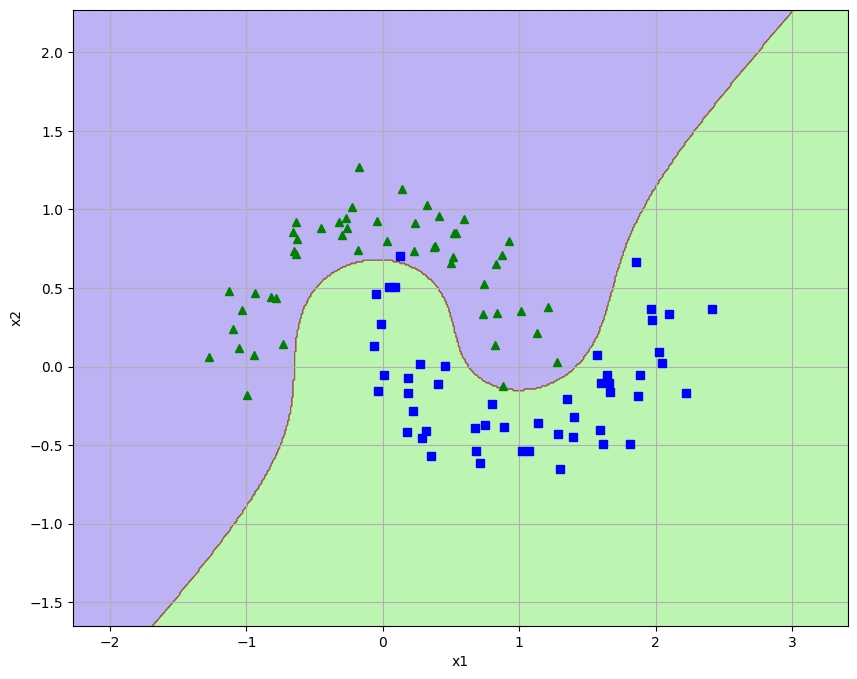

In [114]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=100 , noise=0.15 , random_state=42)
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree = 3),
                                   StandardScaler(),
                                   LinearSVC(C=10 , max_iter=10_000 , random_state=42)
                                   )
polynomial_svm_clf.fit(X,y)

def plot_decision_boundary(model , X , y , ax = None , title1 = None):
    h = 0.01
    x_min , x_max = X[:,0].min() -1 , X[: , 0].max() +1
    y_min , y_max = X[:,1].min() -1 , X[: , 1].max() +1
    xx , yy = np.meshgrid(np.arange(x_min , x_max ,h) , np.arange(y_min , y_max , h))
    X_new = np.c_[xx.ravel(),yy.ravel()]
    y_pred= model.predict(X_new).reshape(xx.shape)
    
    if ax is None :
        ax = plt.gca()
    ax.contourf(xx ,  yy , y_pred , cmap = plt.cm.brg , alpha = 0.3)
    ax.plot(X[y==0][:,0] , X[y==0][:,1],"g^")
    ax.plot(X[y==1][:,0] , X[y==1][:,1],"bs")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    if title1 != None:
        ax.set_title(title1)
        
    ax.grid(True)


plt.figure(figsize=(10,8))
plt.grid(True)
plot_decision_boundary(polynomial_svm_clf , X , y)
plt.show()

In [115]:
#polynormal kernel 
from sklearn.svm import SVC
poly_kernel_clf = make_pipeline(StandardScaler(),
                                SVC(kernel = "poly" , degree = 3 , coef0 = 1 , C = 5))
poly_kernel_clf.fit(X,y)

poly_kernel_clf2 = make_pipeline(StandardScaler(),
                                SVC(kernel = "poly" , degree =10 , coef0 = 100 , C = 5))
poly_kernel_clf2.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

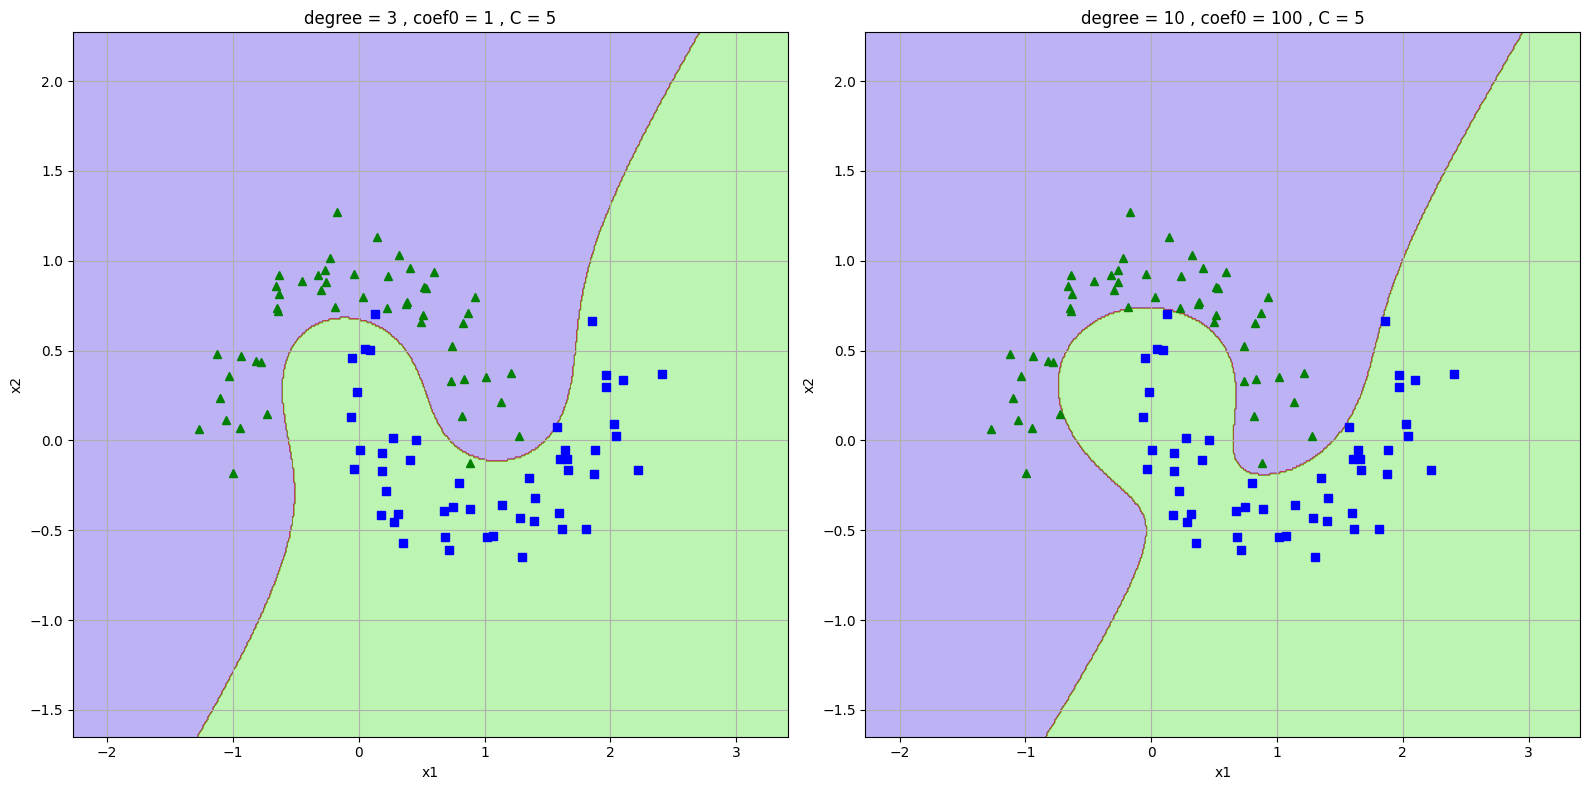

In [116]:
fig , axs = plt.subplots(1 ,2 ,figsize = (16 , 8))
plot_decision_boundary(poly_kernel_clf , X , y , axs[0] , "degree = 3 , coef0 = 1 , C = 5")

plot_decision_boundary(poly_kernel_clf2 , X , y , axs[1] , "degree = 10 , coef0 = 100 , C = 5")

plt.tight_layout()
plt.show()